In [22]:
import pandas as pd

print('Hello from Jupyter')
#url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

data = pd.read_html(url, flavor='bs4', header=0, encoding='UTF-8')
print(data[2])
print(data[3])
print(data[4])

dfs = {'IMF': data[2], 'WB': data[3], 'UN': data[4]}

Hello from Jupyter
    Country/Territory     US$
0         Luxembourg†  131782
1        Switzerland†   94696
2            Ireland†   94556
3             Norway†   81995
4      United States†   68309
..                ...     ...
190           Malawi†     432
191       Mozambique†     425
192          Somalia†     347
193      South Sudan†     315
194          Burundi†     265

[195 rows x 2 columns]
             Country/Territory     US$
0               Monaco† (2018)  185741
1        Liechtenstein† (2017)  173356
2                  Luxembourg†  114705
3                       Macau†   84096
4                 Switzerland†   81994
..                         ...     ...
190                Mozambique†     492
191  Central African Republic†     468
192                     Sudan†     442
193                    Malawi†     412
194                   Burundi†     261

[195 rows x 2 columns]
             Country/Territory     US$
0                      Monaco†  190532
1               Liechtenste

In [24]:
pat = r' \(20\d{2}\)$'

for df in dfs.values():
    df.replace({ 'Country/Territory': '†'}, {'Country/Territory': ''}, regex=True, inplace=True)
    df.replace({ 'Country/Territory': pat}, {'Country/Territory': ''}, regex=True, inplace=True)
    print(df.head(20))

   Country/Territory     US$
0         Luxembourg  131782
1        Switzerland   94696
2            Ireland   94556
3             Norway   81995
4      United States   68309
5            Denmark   67218
6            Iceland   65273
7          Singapore   64103
8          Australia   62723
9              Qatar   59143
10            Sweden   58977
11             Macau   58004
12       Netherlands   58003
13           Finland   54330
14           Austria   53859
15           Germany   51860
16           Belgium   50103
17        San Marino   49765
18            Canada   49222
19         Hong Kong   49036
   Country/Territory     US$
0             Monaco  185741
1      Liechtenstein  173356
2         Luxembourg  114705
3              Macau   84096
4        Switzerland   81994
5            Ireland   78661
6             Norway   75420
7            Iceland   66945
8      United States   65281
9          Singapore   65233
10             Qatar   64782
11           Denmark   59822
12         Aus

In [29]:
df_all = pd.merge(dfs['IMF'], dfs['WB'], on='Country/Territory', suffixes=['_IMF', '_WB'])
df_all = pd.merge(df_all, dfs['UN'], on='Country/Territory').rename(columns={'US$': 'US$_UN'})

df_all = df_all.set_index('Country/Territory')
df_all.head(20)

,US$_IMF,US$_WB,US$_UN
Country/Territory,,,
Luxembourg,131782,114705,115481
Switzerland,94696,81994,85135
Ireland,94556,78661,81637
Norway,81995,75420,74986
United States,68309,65281,65134
Denmark,67218,59822,60657
Iceland,65273,66945,71345
Singapore,64103,65233,64103
Australia,62723,54907,54763


<AxesSubplot:xlabel='Country/Territory'>

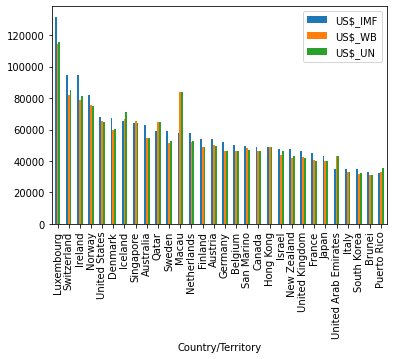

In [30]:
df_all.head(30).plot.bar()